# Generalized Linear Models

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd

//anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
//anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
//anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Linear regressions have limitations.

As it stands, the algorithm could generate a prediction *anywhere on the real number line*. This *may* be realistic, like if I'm predicting national surpluses/debts.

But what if I'm predicting values of a variable that doesn't take, say, negative values, like temperature in Kelvin?

What if I'm predicting values of a variable that takes only integer values, like the number of mouseclicks on my killer ds blog per minute?

What if I'm predicting probabilities? Or something Boolean / Bernoullian?

What if the shape of my errors changes as a function of the dependent variable?

Am I stuck using linear regression? There's got to be a better way!

The strategy now is to *generalize* the notion of linear regression; regression will become a special case. In particular, we'll keep the idea of the regression best-fit line, but now **we'll allow the model to be constructed from the dependent variable through some (non-trivial) function of the linear predictor**. This function is standardly called the **link function**.

Let's say we've constructed our best-fit line, i.e. our linear predictor, $\hat{L} = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

And now imagine applying a link function ... Check out Wikipedia's page on [Generalized Linear Models](https://en.wikipedia.org/wiki/Generalized_linear_model)!

## Logistic Regression

Consider the following transformation: <br/>
$\large\hat{y} = \Large\frac{1}{1 + e^{-\hat{L}}} \large= \Large\frac{1}{1 + e^{-(\beta_0 + ... + \beta_nx_n)}}$. This is called the **sigmoid function**.

We're imagining that $\hat{L}$ can take any values between $-\infty$ and $\infty$.

$\large\rightarrow$ But what values can $\hat{y}$ take? What does this function even look like?

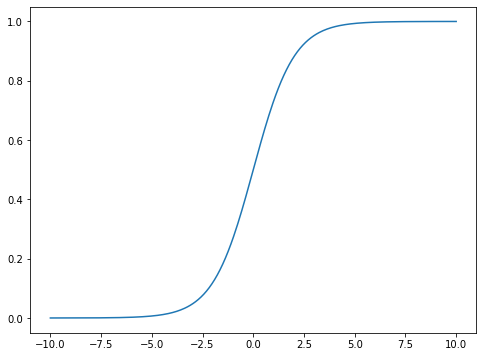

In [4]:
# Let's plot this function here:

X = np.linspace(-10, 10, 300)

plt.figure(figsize=(8, 6))

plt.plot(X, 1/(1+np.exp(1)**(-X)))

How do we fit a line to our dependent variable if its values are already stored as probabilities? We can use the inverse of the sigmoid function, and just set our regression equation equal to that. The inverse of the sigmoid function is called the **logit function**, and it looks like this:

$\large f(y) = \ln\left(\frac{y}{1 - y}\right)$. Notice that the domain of this function is $(0, 1)$.

$\hspace{110mm}$(Quick proof that logit and sigmoid are inverse functions:

$\hspace{170mm}x = \frac{1}{1 + e^{-y}}$; <br/>
$\hspace{170mm}$so $1 + e^{-y} = \frac{1}{x}$; <br/>
$\hspace{170mm}$so $e^{-y} = \frac{1 - x}{x}$; <br/>
$\hspace{170mm}$so $-y = \ln\left(\frac{1 - x}{x}\right)$; <br/>
$\hspace{170mm}$so $y = \ln\left(\frac{x}{1 - x}\right)$.)

Our regression equation will now look like this:

$\large\ln\left(\frac{y}{1 - y}\right) = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

This equation is used for a **logistic regression**: Its characteristic link function is this logit function.

There are other ways to squeeze the results of a linear regression into the set (0, 1).

But *this* function represents the **log-odds** of success (y = 1).

### Logistic Regression in Sci-Kit Learn

In [5]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('heart.csv')


X = data.drop('target', axis=1)
y = data['target']

data.head()

//anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Let's split our data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


In [14]:
# Instantiate a logistic regression object with the 'liblinear' solver,
# which is good for small datasets.

logreg = LogisticRegression(solver='liblinear', multi_class='auto')

# Now fit it to the training data.

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Let's call .predict() on the first row of our testing data.

logreg.predict(X_test.head(1))

array([0])

In [16]:
# .predict() vs. .predict_proba()

logreg.predict_proba(X_test.head(1))


array([[0.90433112, 0.09566888]])

In [17]:
y_test.head(1)

179    0
Name: target, dtype: int64

In [18]:
logreg.score(X_test, y_test)

0.868421052631579

## Poisson Regression

Here's a different sort of regression equation:

$\large\ln(y) = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$. The link function is simply $\ln(y)$ and so we have:

$\large\hat{y} = e^\hat{L} = e^{\beta_0 + ... + \beta_nx_n}$.

The domain, or "support", for a Poisson distribution is {0, 1, 2, ... }. Can you see why?

### Poisson Regression in Statsmodels

In [19]:
awards = pd.read_csv('https://stats.idre.ucla.edu/stat/data/poisson_sim.csv')

In [20]:
awards.head()

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40


What is this dataset about?

The data show the number of awards earned by students at one high school. 'Prog' is a coded version of the sort of program in which the student was enrolled and 'math' is a score on a math exam.

Let's one-hot encode it:

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe = OneHotEncoder(categories='auto')

ohe_new = ohe.fit_transform(awards['prog'].values.reshape(-1, 1))

In [23]:
awards_dums = pd.concat([awards, pd.DataFrame(ohe_new.todense())], axis=1)

In [24]:
awards_dums.head()

,id,num_awards,prog,math,0,1,2
0,45,0,3,41,0.0,0.0,1.0
1,108,0,1,41,1.0,0.0,0.0
2,15,0,3,44,0.0,0.0,1.0
3,67,0,3,42,0.0,0.0,1.0
4,153,0,3,40,0.0,0.0,1.0


In [26]:
# Get a statsmodels summary here!

X = sm.add_constant(awards_dums[['math', 0, 1, 2]])
y = awards_dums['num_awards']
poi_model = sm.GLM(y, X, sm.families.Poisson())
poi_model.fit().summary()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.75
Date:                Wed, 25 Sep 2019   Deviance:                       189.45
Time:                        11:02:39   Pearson chi2:                     212.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5719      0.459     -7.774      0.000      -4.472      -2.671
math           0.0702      0.011      6.619      0.000       0.049       0.091
0             -1.6752      0.289     -5.804      0.000      -2.241      -1.109
1             -0.5913      0.248     -2.380      0.017      -1.078      -0.104
2             -1.3054      0.259     -5.040      0.000      -1.813      -0.798
==============================================================================
"""

In [27]:
# Interpreting the results

np.exp(0.0702)

1.072722704342061